In [5]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Filename

In [6]:
filename = 'test_ising.dat'
data = json.load(open(filename))

# Simulation

In [7]:
print('Model', data['model'])
print('Number of spins', data['nspins'])
print('Beta', data['beta'])
print('Optimizer', data['optimizer'])
print('Gradient', data['gradient'])
print('Backend', data['backend'])
print('Shots', data['shots'])
print('Learning rate', data['learning_rate'])
print('Number of layers', data['nlayer'])
print('Threshold', data['threshold'])
print('Final coupling', data['final_coupling'])
print('Ansatz', data['ansatz'])

Model 1D pbc Ising model
Number of spins 6
Beta 5.0
Optimizer sgd
Gradient spsa
Backend statevector_simulator
Shots 8192
Learning rate 0.001
Number of layers 14
Threshold 1e-05
Final coupling 1.5
Ansatz Adiabatic_with_connectivity


# Variational Energy

Value error.
beta:  (nan+nanj)
hamiltonian:  [[-9.+0.j -1.+0.j -1.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j -3.+0.j  0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j -3.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ... -3.+0.j  0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...  0.+0.j -3.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ... -1.+0.j -1.+0.j -9.+0.j]]
Value error occured.
Final beta:  5.0


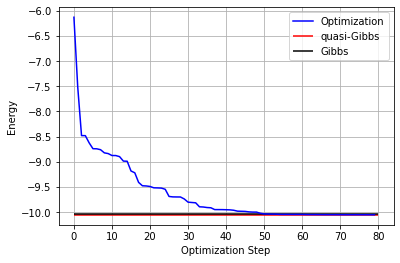

In [8]:
from analytic import *

beta = data['beta']
nspins = data['nspins']
connectivity = data['connectivity']
J = data['final_coupling']
if data['model'] == "1D pbc Ising model" or data['model'] == "2D pbc Ising model":
    exact, best = get_exact_and_best_for_ising(beta, nspins, final_parameters=(-J, -1.))
if data['model'] == '2D pbc Heisenberg model':
    exact, best = get_exact_and_best_for_heisenberg(beta, nspins, (J[0], J[1]), connectivity)

plt.figure()
plt.plot(data['variational_energy'], 'b', label='Optimization')
plt.xlabel('Optimization Step')
plt.ylabel('Energy')
plt.grid()
if data['model'] == "1D pbc Ising model" or data['model'] == "2D pbc Ising model" or data['model'] == '2D pbc Heisenberg model':
    plt.hlines(best, color='r', xmin=0, xmax=len(data['variational_energy']), label='quasi-Gibbs')
    plt.hlines(exact, color='k', xmin=0, xmax=len(data['variational_energy']), label='Gibbs')
plt.legend()